# Comparison check between Rosie's original run and latest updates

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx

## Load history output data

In [85]:
# Rosie's rewind baseline
data_rosie_base = xr.open_dataset('seb_CLM5-SPfates-def_rewindtest0.clm2.h0.2001.nc')
data_rosie_base_2000 = xr.open_dataset('seb_CLM5-SPfates-def_rewindtest0.clm2.h0.2000.nc')

# Rosie's test using latest branch commits (at 51112200)
data_rosie_last = xr.open_dataset('greg_sp_test_nosai.clm2.h0.2001.nc')

# Greg test using latest branch in spmode - includes fix to `tlai_hist_patch` indexing
data_greg_last = xr.open_dataset('sp_mode-dev053-2year-srof.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Ca887ad1f-F51112204.intel.clm2.h0.2001.nc')

# Greg test using latest branch in FBG + Nocomp only
data_ncfbg_last = xr.open_dataset('sp_mode-dev053-2year-srof-fgb_nc.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cb9f4ef9a-F51112204.intel.clm2.h0.2001.nc')

# Greg test using latest branch but reinstating the nocomp_label_pft that Charlie noted
data_areapft_last = xr.open_dataset('sp_mode-dev053-srof-revertarea_pft.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cb9f4ef9a-F51112204.intel.clm2.h0.2001.nc')

# Greg test using latest branch but reinstating the nocomp_label_pft + small patch removal
data_rev_last = xr.open_dataset('sp_mode-dev053-srof-revertnocomp_label-revertsmallarea.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cb9f4ef9a-F51112204.intel.clm2.h0.2001.nc')
data_rev_last_2000 = xr.open_dataset('sp_mode-dev053-srof-revertnocomp_label-revertsmallarea.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cb9f4ef9a-F51112204.intel.clm2.h0.2000.nc')

# Greg test using latest branch but reverting the dynamics refactor I introduced
data_revref_last = xr.open_dataset('sp_mode-dev053-srof-revertrefactor.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cb9f4ef9a-F443550de.intel.clm2.h0.2001.nc')

## Check the dimension mapping size

## TLAI

The plots of TLAI below represent the type correction that [Charlie recommended](https://github.com/ESCOMP/CTSM/pull/1182#discussion_r694458033).  We can see comparing the first and second plot to the third, that the TLAI looks correct as of [this commit](https://github.com/ESCOMP/CTSM/pull/1182/commits/b9f4ef9a1eb81981acee8628c0660a9bf6a93fa0).

In [3]:
data_rosie_base.TLAI.dims

('time', 'lat', 'lon')

In [4]:
data_rosie_base.TLAI.time.size

12

In [113]:
tlai_rosie_base = data_rosie_base.TLAI
tlai_rosie_base_2000 = data_rosie_base_2000.TLAI
tlai_rosie_last = data_rosie_last.TLAI
tlai_greg_last = data_greg_last.TLAI
tlai_ncfbg_last = data_ncfbg_last.TLAI
tlai_apft_last = data_areapft_last.TLAI
tlai_rev_last = data_rev_last.TLAI
tlai_rev_last_2000 = data_rev_last_2000.TLAI
tlai_revref_last = data_revref_last.TLAI

tlai_rbrl_diff = tlai_rosie_base - tlai_rosie_last
tlai_rbgl_diff = tlai_rosie_base - tlai_greg_last
tlai_rlgl_diff = tlai_rosie_last - tlai_greg_last
tlai_rbnc_diff = tlai_rosie_base - tlai_ncfbg_last
tlai_rbap_diff = tlai_rosie_base - tlai_apft_last
tlai_rbrv_diff = tlai_rosie_base - tlai_rev_last
tlai_rbrf_diff = tlai_rosie_base - tlai_revref_last
tlai_rbrv_2000_diff = tlai_rev_last_2000 - tlai_rev_last_2000

### Rosie rewind baseline - Rosie greg_sp_test_nosai comparison

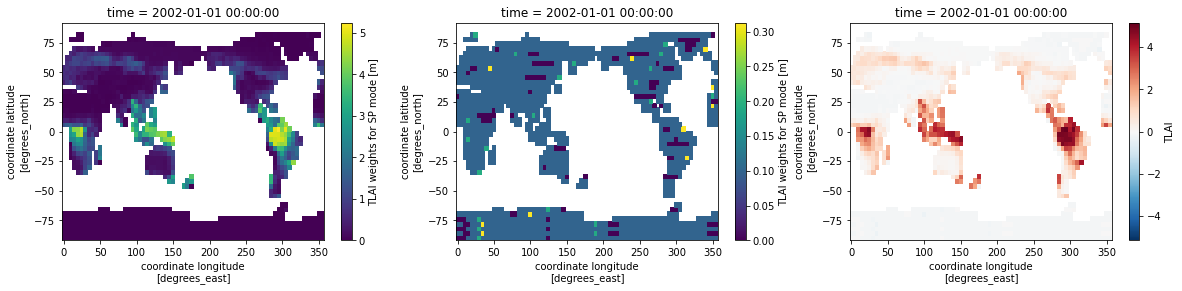

In [114]:
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_rosie_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbrl_diff.isel(time=tstop_idx).plot(ax=ax3)

### Rosie greg_sp_test_nosai baseline - Greg latest comparison 

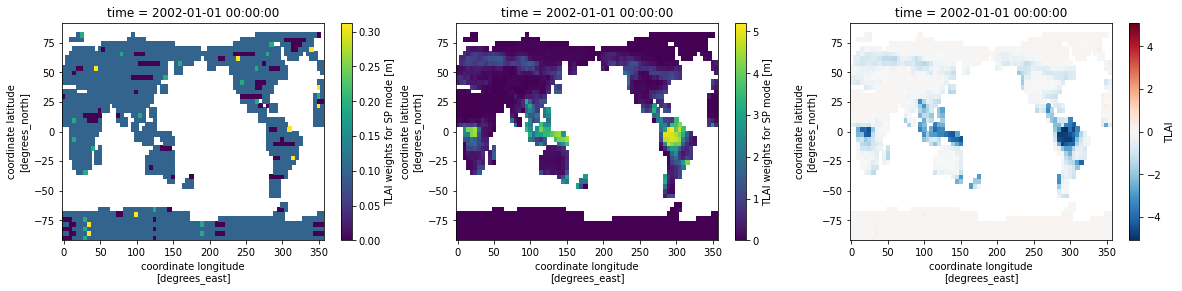

In [115]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_last.isel(time=tstop_idx).plot(ax=ax1)
tlai_greg_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rlgl_diff.isel(time=tstop_idx).plot(ax=ax3)

### Rosie rewind baseline - Greg latest comparison 

Correcting the error Charlie found in the indexing `tlai_hist_patch` removes the striping: https://github.com/ESCOMP/CTSM/pull/1182/commits/b9f4ef9a1eb81981acee8628c0660a9bf6a93fa0

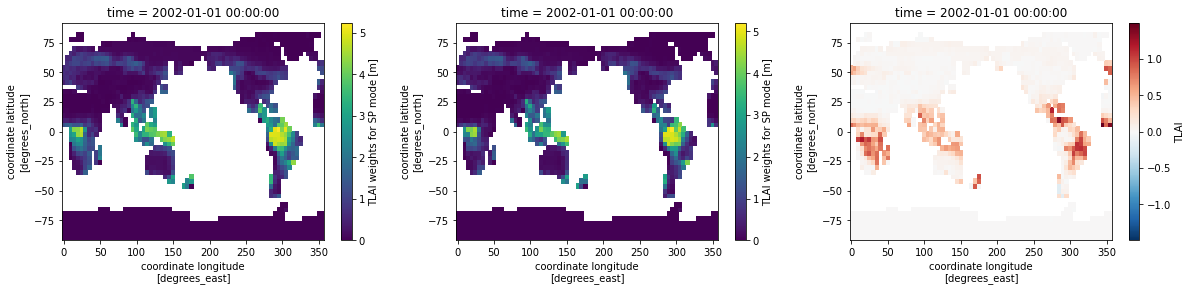

In [116]:
# Rosie baseline - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_greg_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbgl_diff.isel(time=tstop_idx).plot(ax=ax3)

### Rosie rewind baseline - nocomp_label reinstate comparison

Reinstating the nocomp_label_pft code seems to improve the tlai difference overall, with the maximum reduced by about half.  Original commit reverted is here: https://github.com/NGEET/fates/commit/588ac1291c6aa746f7960a35fe2c2e9b8daeec31

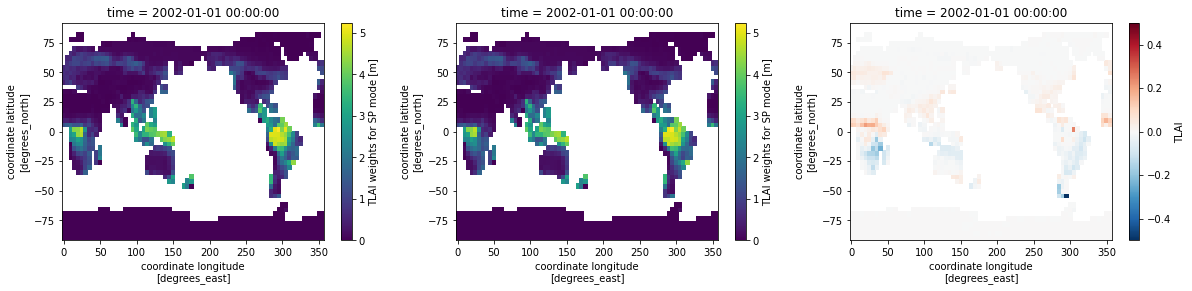

In [117]:
# Rosie baseline - nocomp_label_revert comparison
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_apft_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbap_diff.isel(time=tstop_idx).plot(ax=ax3)

### Rosie rewind baseline - nocomp_label + small patch removal reinstate comparison

Reinstating the small patch removal keeps the TLAI different at the same order of magnitude.  This was [erroneously removed](https://github.com/NGEET/fates/commit/9cc3e7c36af64ca10d5b0be85c199bf5b070951a) in attempting to make the FBG b4b with the previous tag baseline.  It was later discussed that the new FBG results are more correct relative to the old baseline.

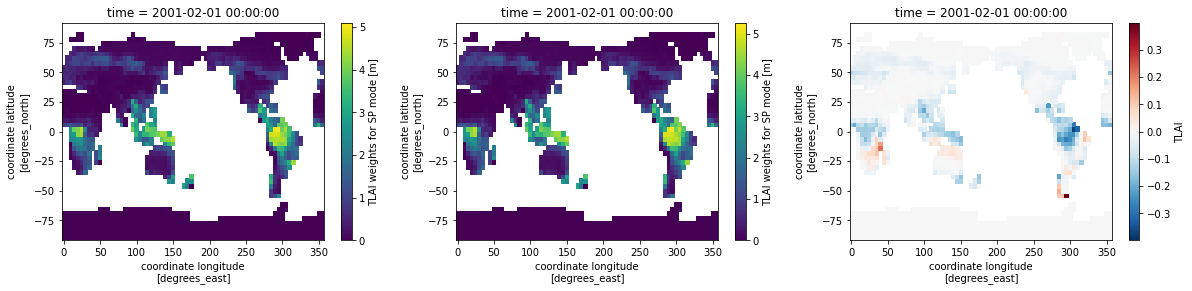

In [118]:
# Rosie baseline - small patch revert comparison - 2001
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_rev_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbrv_diff.isel(time=tstop_idx).plot(ax=ax3)

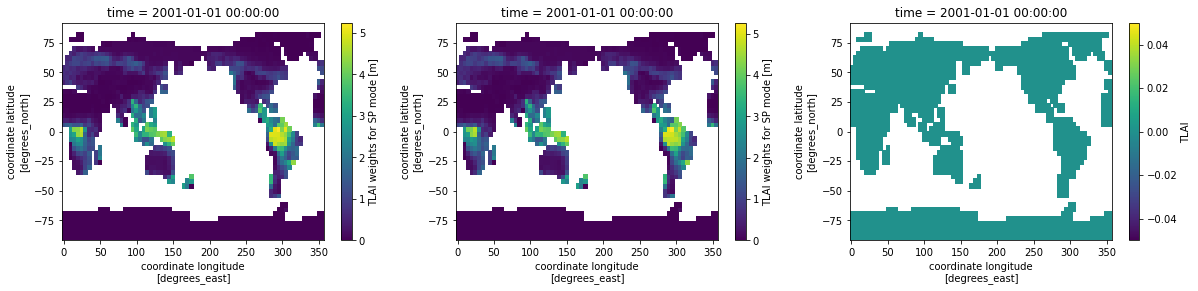

In [119]:
# rosie baseline - small patch revert comparison - 2000
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base_2000.isel(time=tstop_idx).plot(ax=ax1)
tlai_rev_last_2000.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbrv_2000_diff.isel(time=tstop_idx).plot(ax=ax3)

***Does this suggests that there is an issue in switching between years?***

### nocomp_label revert - nocomp_label + small patch removal reinstate comparison

This plots shows the effect of reinstating the small patch removal code.  It appears to make the difference compared to the baseline a bit more pronounced.

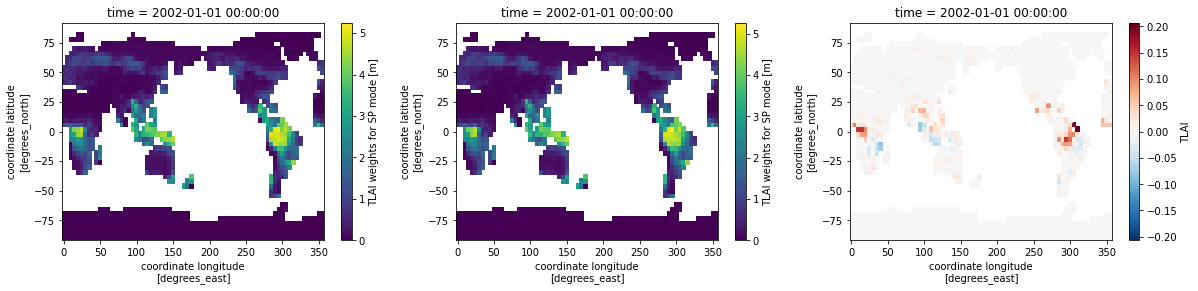

In [120]:
# nocomp_label_revert - small patch revert comparison
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_apft_last.isel(time=tstop_idx).plot(ax=ax1)
tlai_rev_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_aprv_diff = tlai_apft_last-tlai_rev_last
tlai_aprv_diff.isel(time=tstop_idx).plot(ax=ax3)

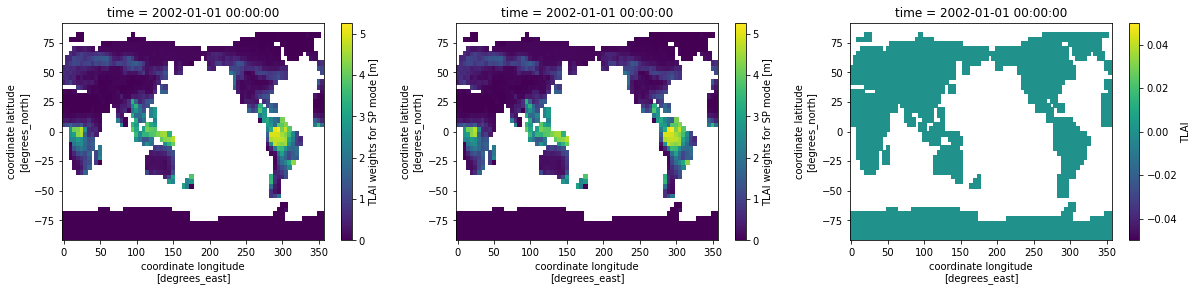

In [121]:
# reversion - small patch revert comparison
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rev_last.isel(time=tstop_idx).plot(ax=ax1)
tlai_revref_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rvrf_diff = tlai_rev_last - tlai_revref_last
tlai_rvrf_diff.isel(time=tstop_idx).plot(ax=ax3)

The above seems to clearly suggest that the refactor of the dynamic section isn't messing with the outcomes

## GPP

In [14]:
data_rosie_base.GPP.dims

('time', 'lat', 'lon')

In [53]:
gpp_rosie_base = data_rosie_base.GPP
gpp_rosie_base_2000 = data_rosie_base_2000.GPP
gpp_rosie_last = data_rosie_last.GPP
gpp_greg_last = data_greg_last.GPP
gpp_ncfbg_last = data_ncfbg_last.GPP
gpp_apft_last = data_areapft_last.GPP
gpp_rev_last = data_rev_last.GPP
gpp_rev_last_2000 = data_rev_last_2000.GPP

gpp_rbrl_diff = gpp_rosie_base - gpp_rosie_last
gpp_rbgl_diff = gpp_rosie_base - gpp_greg_last
gpp_rlgl_diff = gpp_rosie_last - gpp_greg_last
gpp_rbnc_diff = gpp_rosie_base - gpp_ncfbg_last
gpp_rlnc_diff = gpp_rosie_last - gpp_ncfbg_last
gpp_rbap_diff = gpp_rosie_base - gpp_apft_last
gpp_rbrv_diff = gpp_rosie_base - gpp_rev_last
gpp_rbrv_diff_2000 = gpp_rosie_base_2000 - gpp_rev_last_2000

### Rosie rewind baseline - Rosie greg_sp_test_nosai comparison

In [72]:
tstop_idx = 11

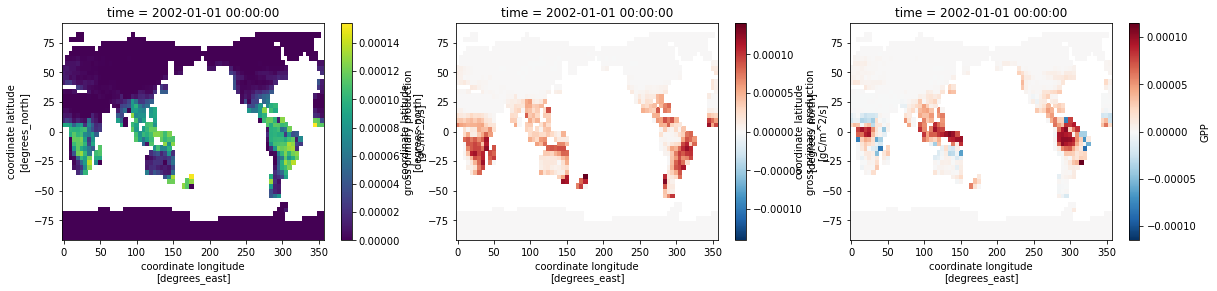

In [73]:
# Rosie baseline - Rosie latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_rosie_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbrl_diff.isel(time=tstop_idx).plot(ax=ax3)

### Rosie greg_sp_test_nosai - Greg latest comparison

The latest commmit tests between Rosie and Greg's run are slightly different.  Fix to `tlai_hist_patch` indexing appears not to have an impact.

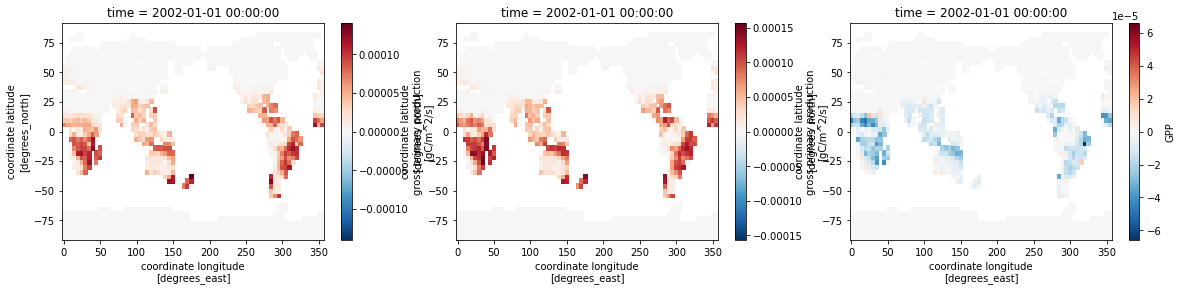

In [74]:
# Rosie latest - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_last.isel(time=tstop_idx).plot(ax=ax1)
gpp_greg_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rlgl_diff.isel(time=tstop_idx).plot(ax=ax3)

### Rosie rewind baseline - nocomp_label reinstate comparison

Reinstating the `nocomp_label_pft` code seems to improve the difference to Rosie's baseline in that the GPP is slightly lower where previously it was higher, relatively

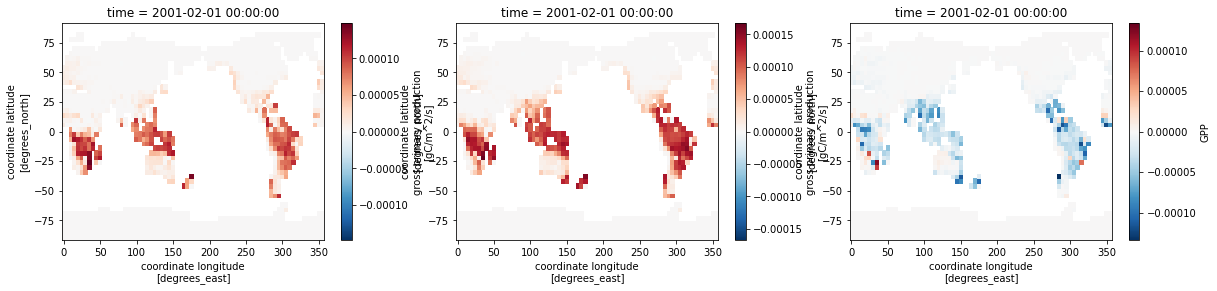

In [18]:
# Rosie baseline - nocomp_label_revert comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_apft_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbap_diff.isel(time=tstop_idx).plot(ax=ax3)

### Rosie rewind baseline - nocomp_label + small patch removal reinstate comparison

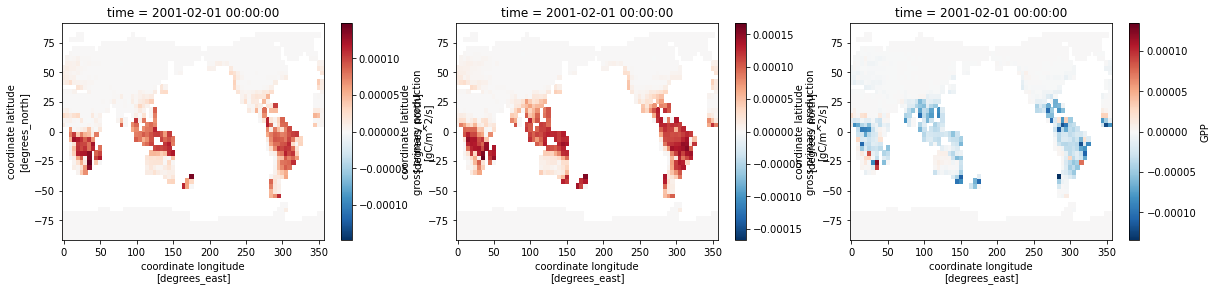

In [19]:
# Rosie baseline - full revert comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_rev_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbrv_diff.isel(time=tstop_idx).plot(ax=ax3)

### nocomp_label revert - nocomp_label + small patch removal reinstate comparison

The small patch removal resinstate seems to only slightly alter the results, but wierdly somehow mucks with the autoscaling even though the difference in the min is small.

In [20]:
print(np.min(gpp_apft_last))
print(np.min(gpp_rev_last))

<xarray.DataArray 'GPP' ()>
array(-1.98868175e-08)
<xarray.DataArray 'GPP' ()>
array(-1.98864285e-08)


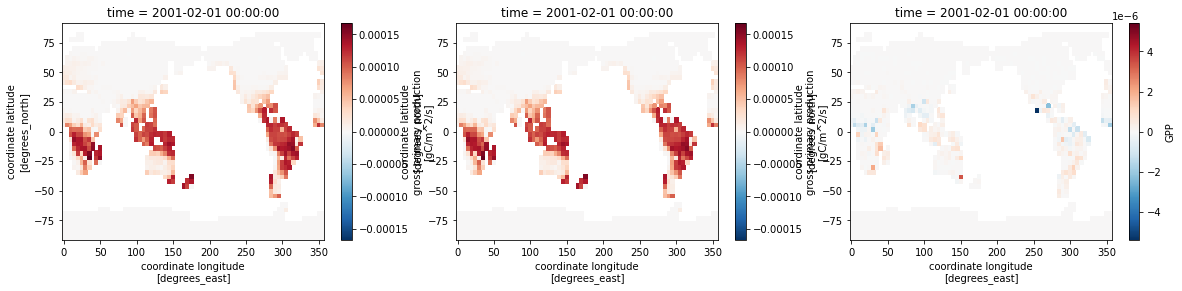

In [21]:
# nocomp_label_revert - full revert comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_apft_last.isel(time=tstop_idx).plot(ax=ax1)
gpp_rev_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_aprv_diff = gpp_apft_last - gpp_rev_last
gpp_aprv_diff.isel(time=tstop_idx).plot(ax=ax3)

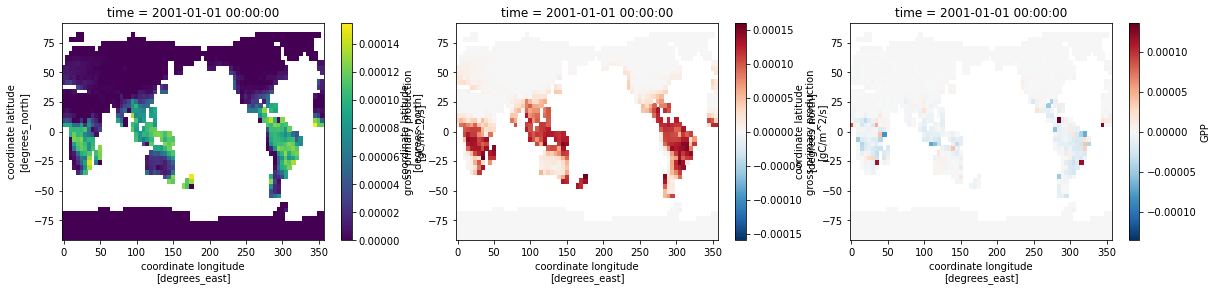

In [86]:
tstop_idx = 11
# nocomp_label_revert - full revert comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base_2000.isel(time=tstop_idx).plot(ax=ax1)
gpp_rev_last_2000.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbrv_diff_2000.isel(time=tstop_idx).plot(ax=ax3)

## PFTnindivs

In [22]:
data_rosie_base.PFTnindivs.dims

('time', 'fates_levpft', 'lat', 'lon')

In [58]:
npft_rosie_base = data_rosie_base.PFTnindivs
npft_rosie_base_2000 = data_rosie_base_2000.PFTnindivs
npft_rosie_last = data_rosie_last.PFTnindivs
npft_greg_last = data_greg_last.PFTnindivs
npft_apft_last = data_areapft_last.PFTnindivs
npft_rev_last = data_rev_last.PFTnindivs
npft_rev_last_2000 = data_rev_last_2000.PFTnindivs

npft_rbrl_diff = npft_rosie_base - npft_rosie_last
npft_rbgl_diff = npft_rosie_base - npft_greg_last
npft_rlgl_diff = npft_rosie_last - npft_greg_last
npft_rbap_diff = npft_rosie_base - npft_apft_last
npft_rbrv_diff = npft_rosie_base - npft_rev_last
npft_rbrv_diff_2000 = npft_rosie_base_2000 - npft_rev_last_2000

In [63]:
figs = (16,8)
tstop_idx = 11

### Rosie rewind baseline

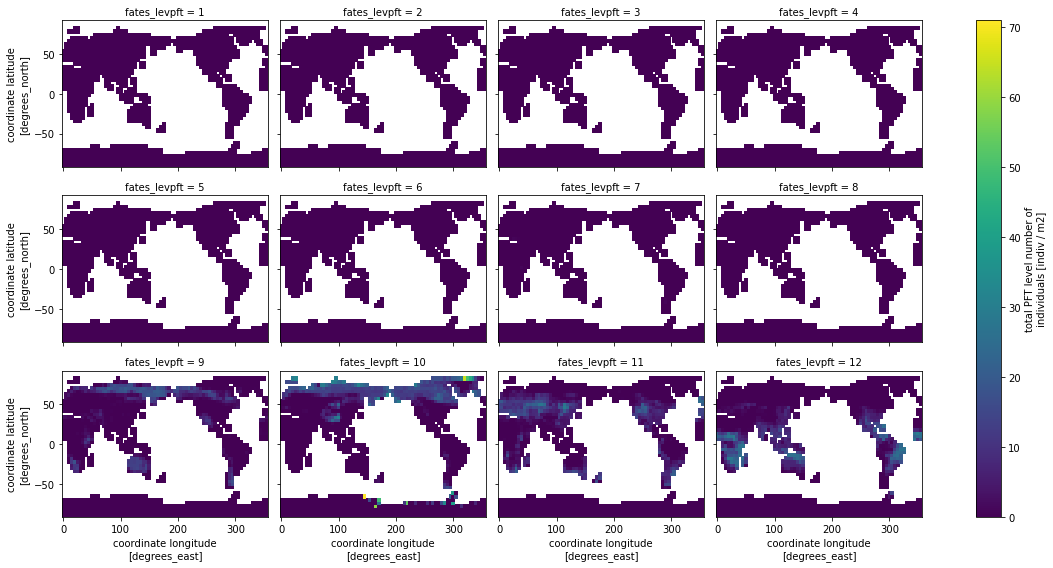

In [64]:
# Rosie baseline: all levels
npft_rosie_base.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - Rosie latest comparison

It looks like the maximum value of the individuals is much higher in Rosie's basline.

In [65]:
print(np.max(npft_rosie_base))
print(np.max(npft_rev_last))
print(np.max(npft_greg_last))
print(np.max(npft_apft_last))
print(np.max(npft_rev_last))

<xarray.DataArray 'PFTnindivs' ()>
array(3170.33203125)
<xarray.DataArray 'PFTnindivs' ()>
array(76.43759918)
<xarray.DataArray 'PFTnindivs' ()>
array(927.69525146)
<xarray.DataArray 'PFTnindivs' ()>
array(927.69525146)
<xarray.DataArray 'PFTnindivs' ()>
array(76.43759918)


Note that the scaling of the plots below is manually adjusted to avoid a swamping effect.

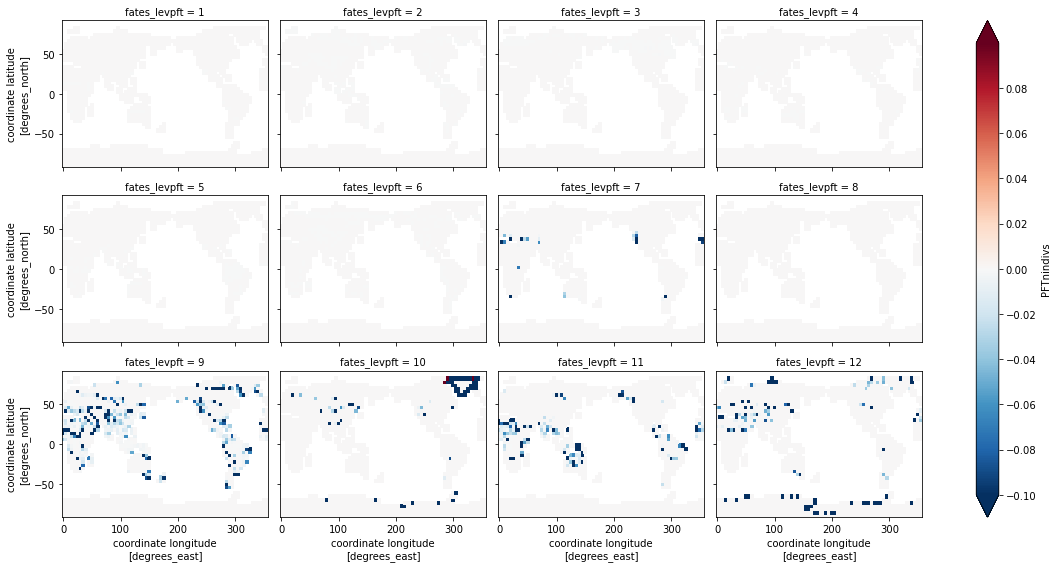

In [66]:
# Rosie baseline-Rosie latest: all levels
npft_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-0.1,0.1,.00001))

### Rosie rewind baseline - nocomp_label reinstate comparison

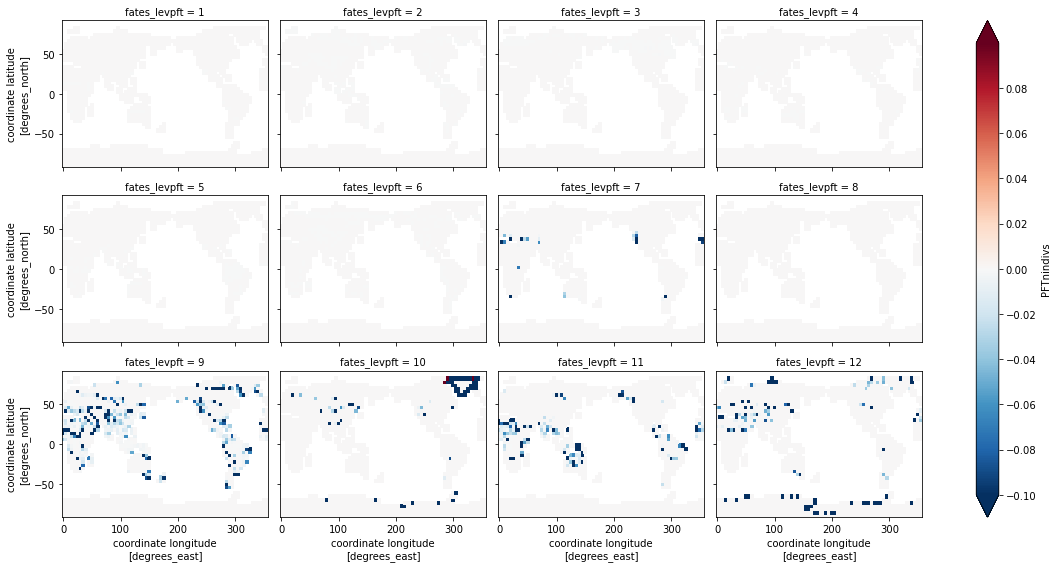

In [67]:
# Rosie baseline-nocomp_label revert: all levels
npft_rbap_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-0.1,0.1,.00001))

### Rosie rewind baseline - nocomp_label + small patch removal reinstate comparison

Reinstating the small patch removal appears to improve the difference in the number of individuals

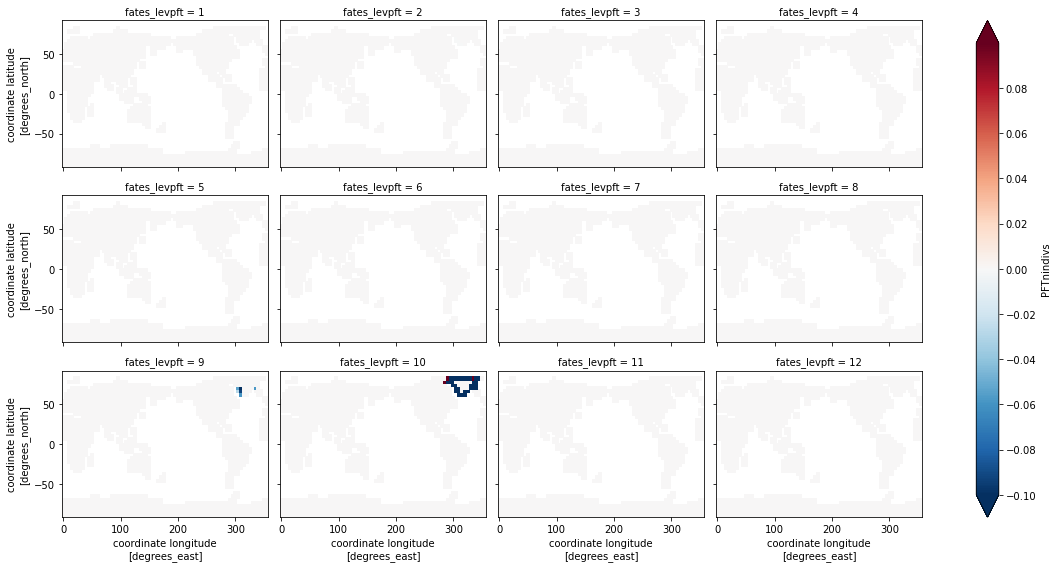

In [68]:
# Rosie baseline-nocomp and small patch revert: all levels
npft_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-0.1,0.1,.00001))

Given that the difference appears to be mostly in the arctic, I'm guessing this is due to ctsm and fates updates to snow code since Nov 2020

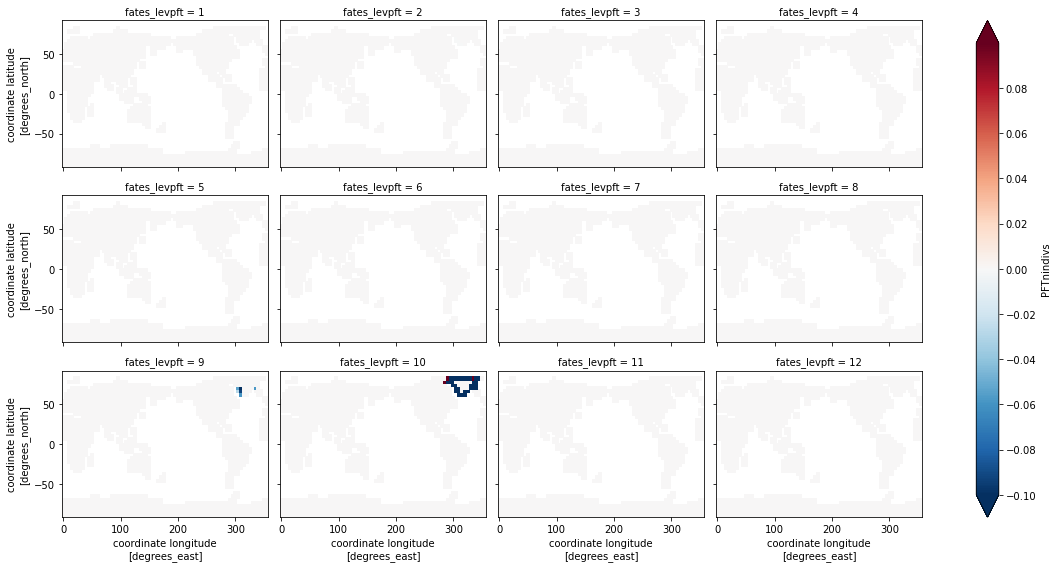

In [89]:
tstop_idx = 11
# Rosie baseline-nocomp and small patch revert: all levels
npft_rbrv_diff_2000.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-0.1,0.1,.00001))
# npft_rbrv_diff_2000.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## PFTbiomass

In [30]:
data_rosie_base.PFTbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [31]:
data_rosie_base.PFTbiomass.fates_levpft.size

12

In [90]:
pbm_rosie_base = data_rosie_base.PFTbiomass
pbm_rosie_base_2000 = data_rosie_base_2000.PFTbiomass
pbm_rosie_last = data_rosie_last.PFTbiomass
pbm_greg_last = data_greg_last.PFTbiomass
pbm_apft_last = data_areapft_last.PFTbiomass
pbm_rev_last = data_rev_last.PFTbiomass
pbm_rev_last_2000 = data_rev_last_2000.PFTbiomass

pbm_rbrl_diff = pbm_rosie_base - pbm_rosie_last
pbm_rbgl_diff = pbm_rosie_base - pbm_greg_last
pbm_rlgl_diff = pbm_rosie_last - pbm_greg_last
pbm_rbap_diff = pbm_rosie_base - pbm_apft_last
pbm_rbrv_diff = pbm_rosie_base - pbm_rev_last
pbm_rbrv_diff_2000 = pbm_rosie_base_2000 - pbm_rev_last_2000

### Rosie rewind baseline

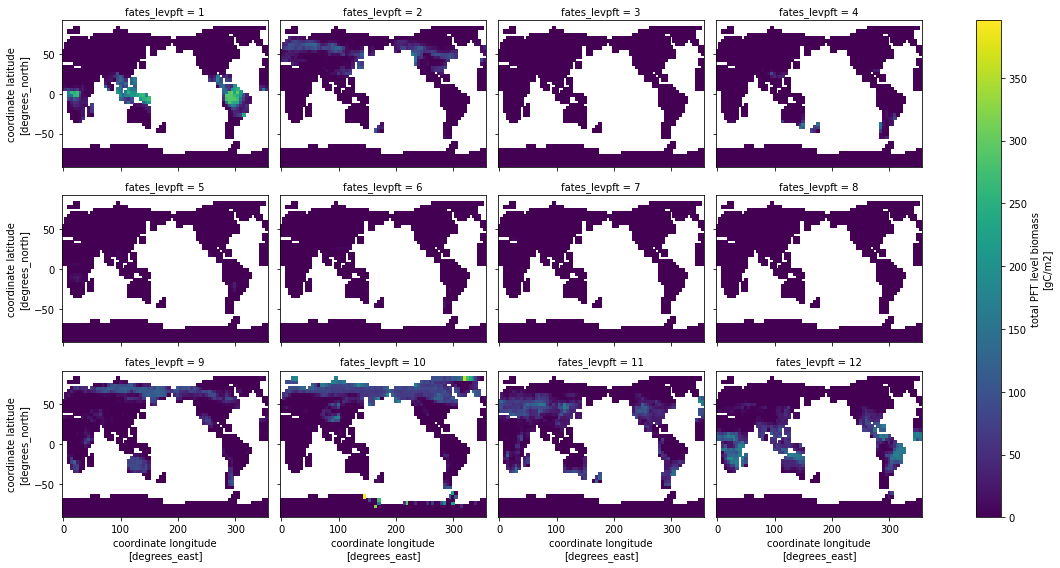

In [91]:
pbm_rosie_base.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - Rosie greg_sp_test_nosai comparison

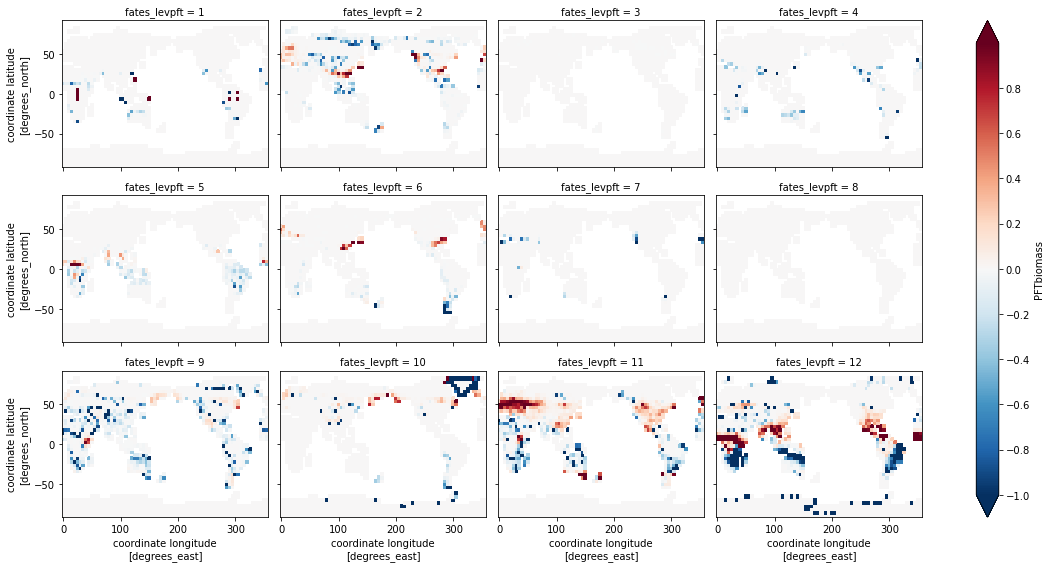

In [92]:
pbm_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-1,1,.001))

### Rosie greg_sp_test_nosai baseline - Greg latest comparison

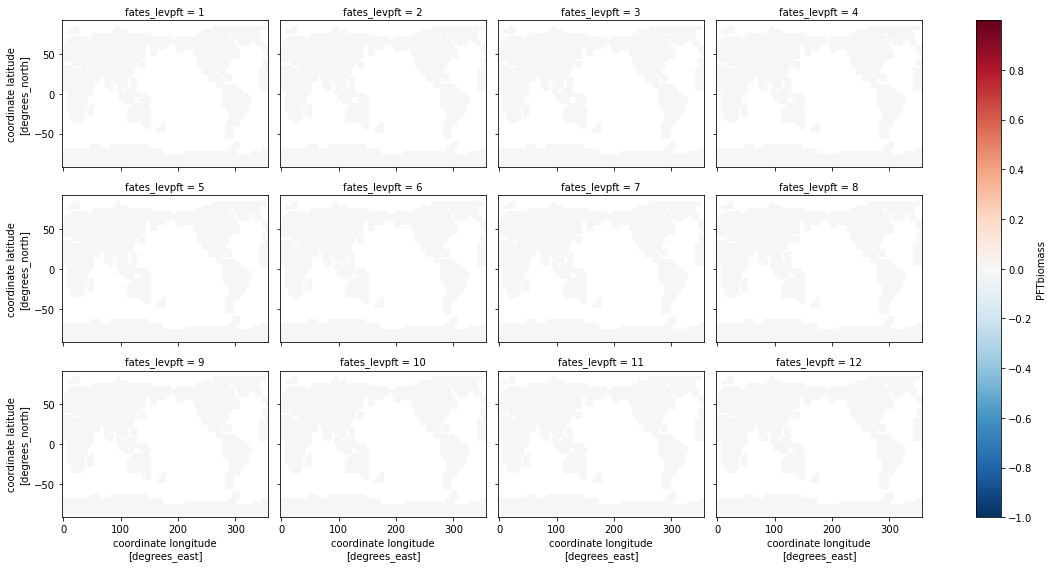

In [93]:
pbm_rlgl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-1,1,.001))

### Rosie rewind baseline - nocomp_label reinstate comparison

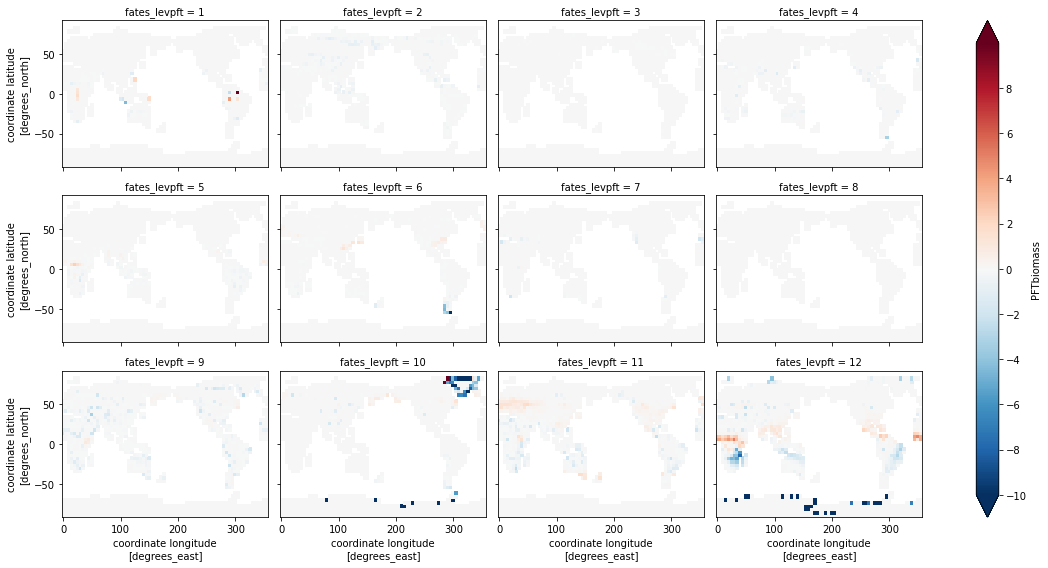

In [94]:
pbm_rbap_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))

### Rosie rewind baseline - nocomp_label + small patch removal reinstate comparison

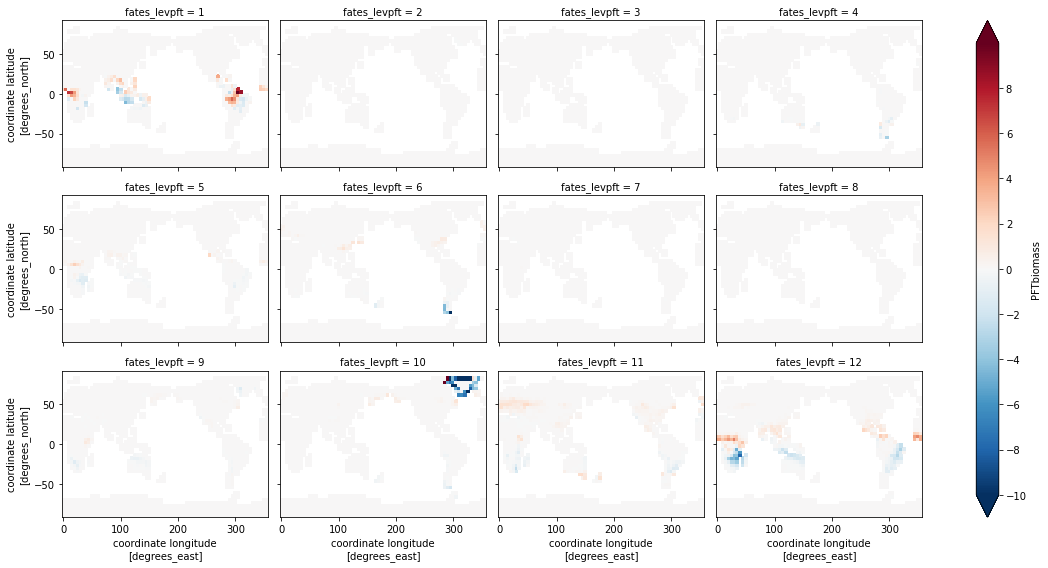

In [95]:
pbm_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))

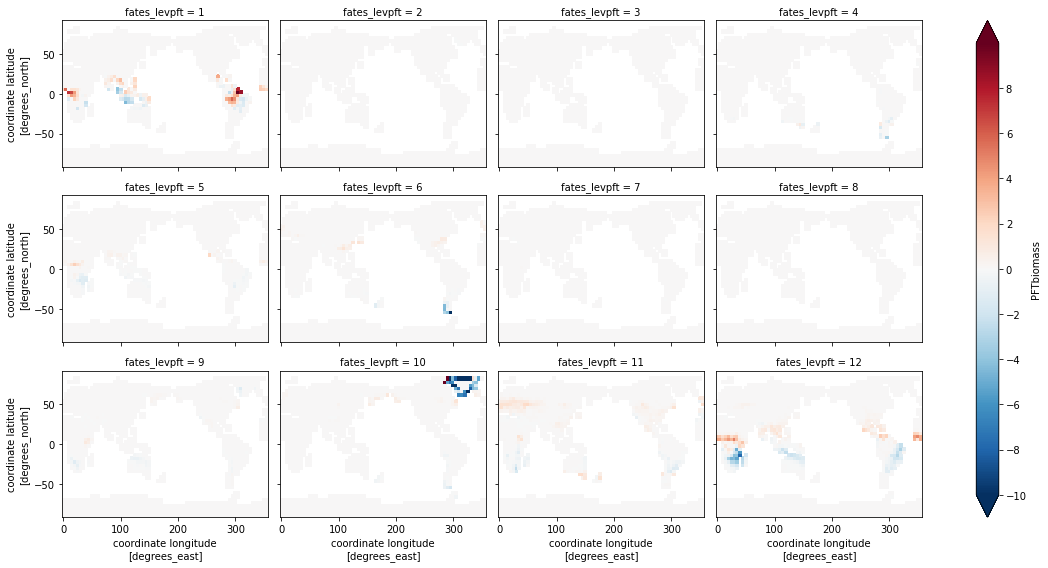

In [98]:
tstop_idx = 11
pbm_rbrv_diff_2000.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))

## PFTleafbiomass

In [38]:
data_rosie_base.PFTleafbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [39]:
data_rosie_base.PFTleafbiomass.fates_levpft.size

12

In [99]:
plbm_rosie_base = data_rosie_base.PFTleafbiomass
plbm_rosie_base_2000 = data_rosie_base_2000.PFTleafbiomass
plbm_rosie_last = data_rosie_last.PFTleafbiomass
plbm_greg_last = data_greg_last.PFTleafbiomass
plbm_apft_last = data_areapft_last.PFTleafbiomass
plbm_rev_last = data_rev_last.PFTleafbiomass
plbm_rev_last_2000 = data_rev_last_2000.PFTleafbiomass

plbm_rbrl_diff = plbm_rosie_base - plbm_rosie_last
plbm_rbgl_diff = plbm_rosie_base - plbm_greg_last
plbm_rlgl_diff = plbm_rosie_last - plbm_greg_last
plbm_rbap_diff = plbm_rosie_base - plbm_apft_last
plbm_rbrv_diff = plbm_rosie_base - plbm_rev_last
plbm_rbrv_diff_2000 = plbm_rosie_base_2000 - plbm_rev_last_2000

### Rosie rewind baseline

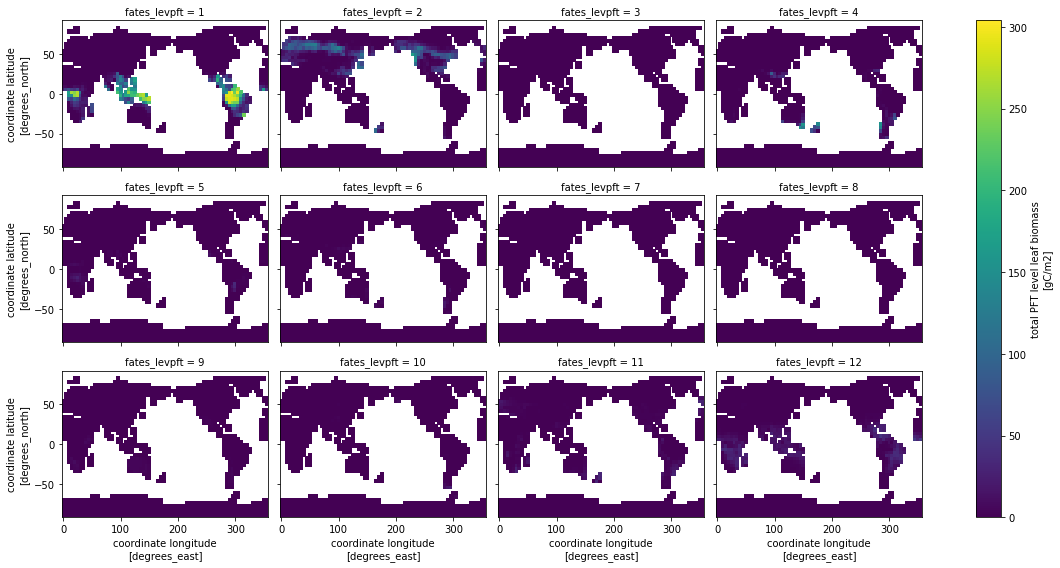

In [100]:
plbm_rosie_base.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - Rosie greg_sp_test_nosai comparison

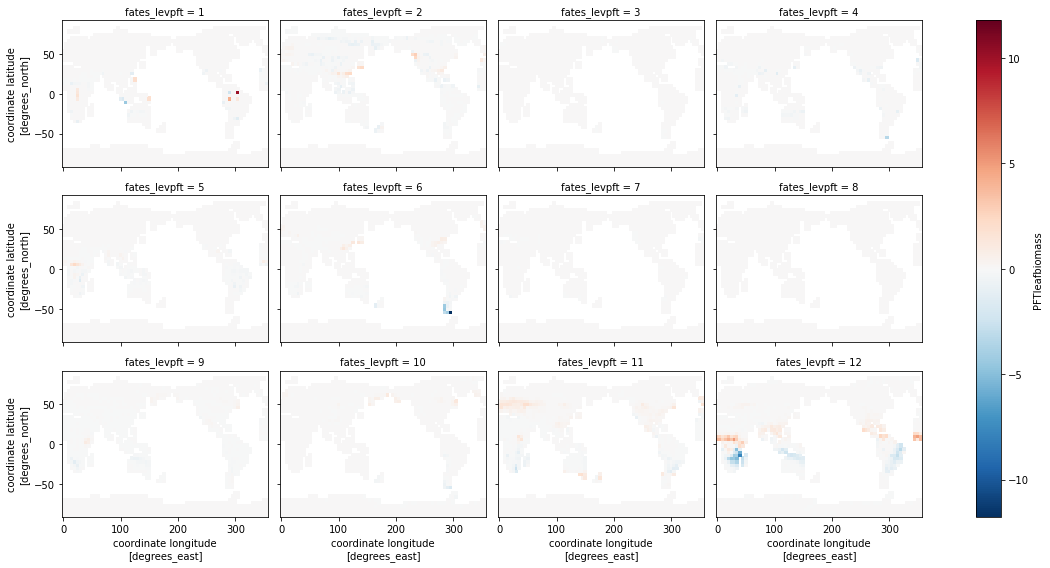

In [101]:
plbm_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)
# plbm_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-1,1,.001))

### Rosie greg_sp_test_nosai baseline - Greg latest comparison

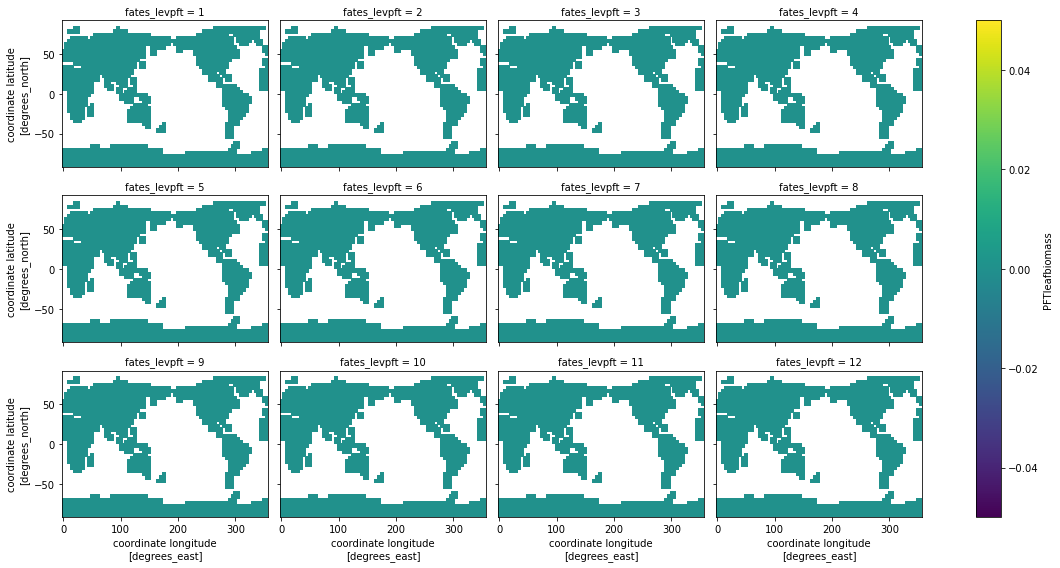

In [102]:
# plbm_rlgl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-1,1,.001))
plbm_rlgl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - nocomp_label reinstate comparison

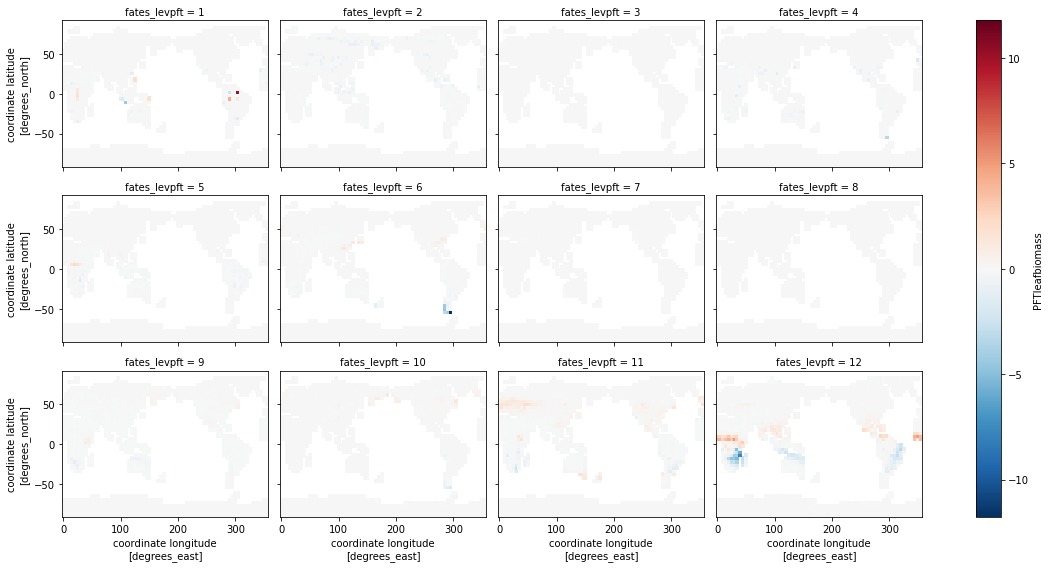

In [105]:
# plbm_rbap_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))
plbm_rbap_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - nocomp_label + small patch removal reinstate comparison

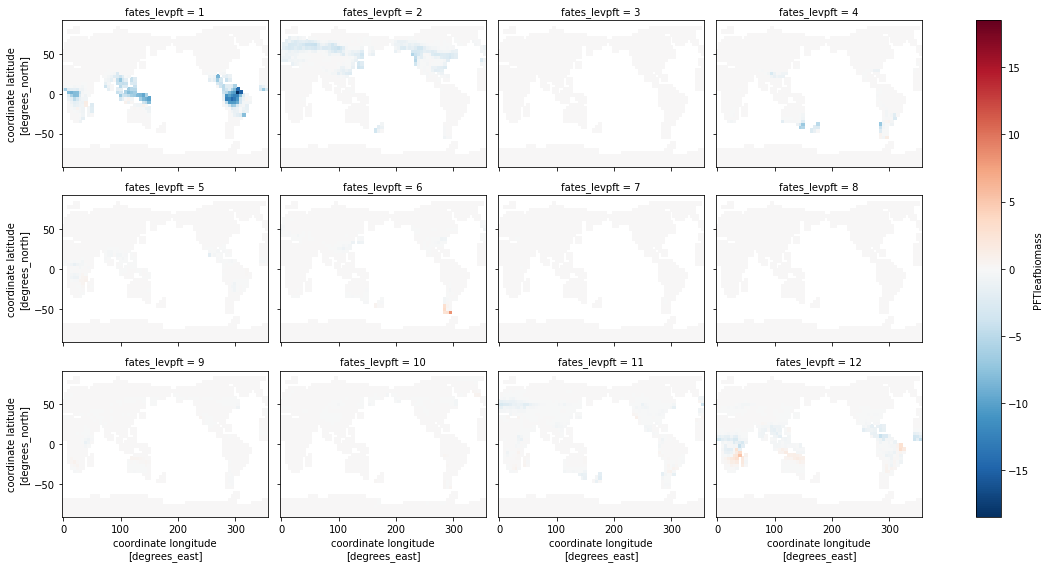

In [112]:
tstop_idx = 0
# plbm_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))
plbm_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

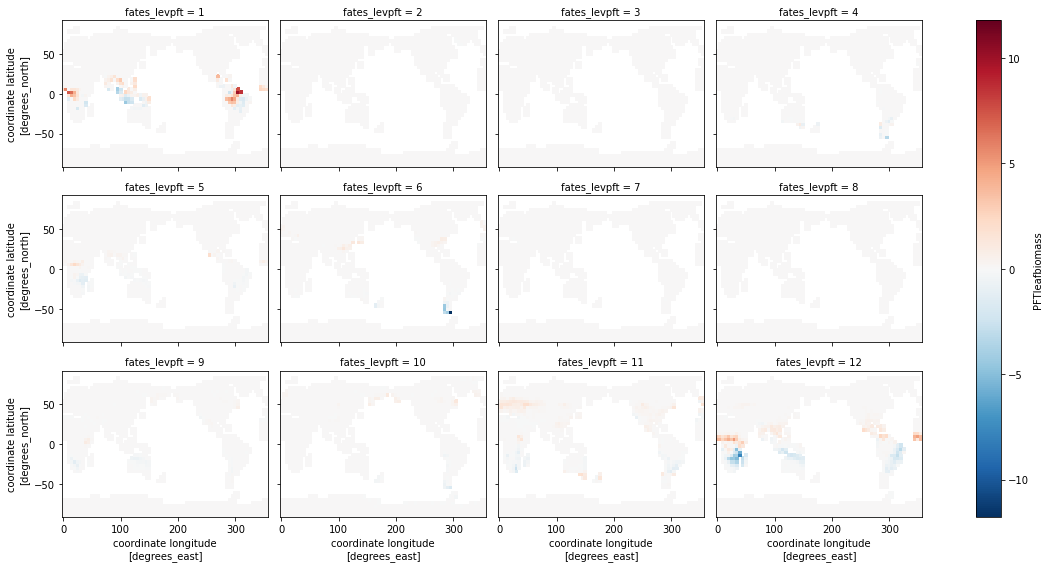

In [109]:
tstop_idx = 11
# plbm_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))
plbm_rbrv_diff_2000.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Variable spatial comparisons

In [46]:
leafc_rosie_base = data_rosie_base.LEAFC
leafc_rev_last = data_rev_last.LEAFC
agb_rosie_base = data_rosie_base.AGB
agb_rev_last = data_rev_last.AGB

leafc_rbrv_diff = leafc_rosie_base - leafc_rev_last
agb_rbrv_diff = agb_rosie_base - agb_rev_last

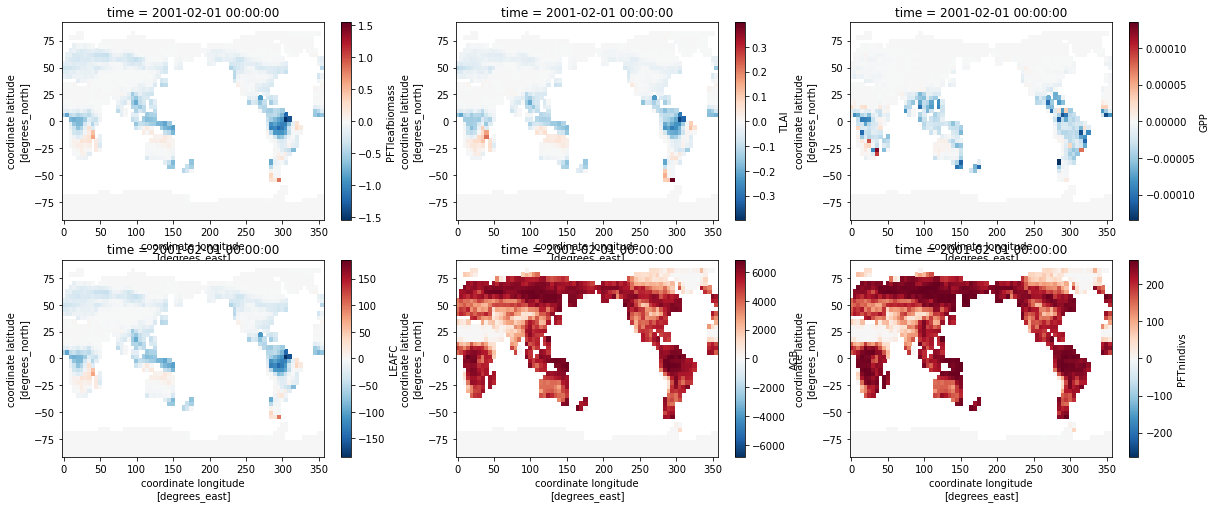

In [47]:
plbm_rosie_base_mean = plbm_rosie_base.mean(dim='fates_levpft')
plbm_rev_last_mean = plbm_rev_last.mean(dim='fates_levpft')
plbm_rbrv_meandiff = plbm_rosie_base_mean - plbm_rev_last_mean

npft_rosie_base_mean = npft_rosie_base.mean(dim='fates_levpft')
npft_rev_last_mean = npft_rev_last.mean(dim='fates_levpft')
npft_rbrv_meandiff = npft_rosie_base_mean - npft_rev_last_mean

# nocomp_label_revert - full revert diffs
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 8))
plbm_rbrv_meandiff.isel(time=tstop_idx).plot(ax=ax1)
tlai_rbrv_diff.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbrv_diff.isel(time=tstop_idx).plot(ax=ax3)
npft_rbrv_meandiff.isel(time=tstop_idx).plot(ax=ax6)
leafc_rbrv_diff.isel(time=tstop_idx).plot(ax=ax4)
agb_rbrv_diff.isel(time=tstop_idx).plot(ax=ax5)

The above suggests that the issue here is with the `leaf_m` calculation which is common between PFTleafbiomass, TLAI, LEAFC and AGB

### Initialization comparison